In [1]:
from NeuralNetwork import Neural_Network

In [2]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
data = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(data.train.images)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
L = [10, 10]
activations = ['relu', 'softmax']
nn = Neural_Network(L, activations)
paramaters = nn.init_param(28*28)
cost_tests = []
batch_test = data.test.next_batch(100)

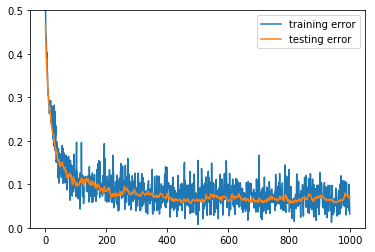

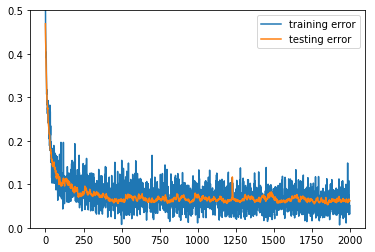

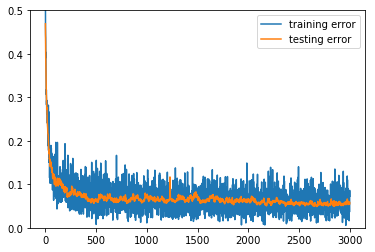

In [20]:
for i in range(1, 3000):
    batch = data.train.next_batch(50)  
    nn.train(scaler.transform(batch[0]), batch[1], alpha=0.1, lambd=0.2, keep_prob=1)


    cost_test = nn.cost_test(scaler.transform(batch_test[0]), batch_test[1])
    cost_tests.append(cost_test)

    if (i+1) % 1000 == 0:
        plt.plot(nn.costs, label ='training error')
        plt.plot(cost_tests, label ='testing error')
        plt.ylim(0,0.5)
        plt.legend()
        plt.show()

In [21]:
from sklearn.metrics import accuracy_score
print('Training accuracy:',accuracy_score(
    data.train.labels, nn.predict(
        scaler.transform(data.train.images))))
print('Testing accuracy:',accuracy_score(
        data.test.labels, nn.predict(
            scaler.transform(data.test.images))))
  

Training accuracy: 0.9324
Testing accuracy: 0.9267


8


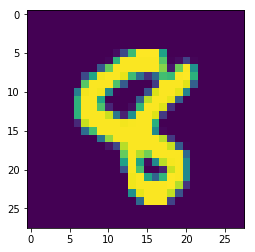

In [23]:
x_test = data.test.next_batch(1)[0]
y_ = nn.predict(scaler.transform(x_test))
print(np.argmax(y_))
plt.imshow(x_test.reshape([28,28]))
plt.show()